In [78]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [1]:
from sklearn.datasets import load_iris    

iris = load_iris()

print(iris.data.shape) # prints the shape of the data (number of samples, number of features)
print(iris.target) # prints the target labels
print(iris.feature_names) # prints the feature names


(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

iris_data = pd.read_csv(url, names=names)

print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Checking for missing values in the dataset


In [5]:
import pandas as pd


def handle_missing_values(iris_data):
  """
  Checks for missing values in a pandas DataFrame and handles them using different strategies.

  Args:
    df: A pandas DataFrame.

  Returns:
    A pandas DataFrame with missing values handled.
  """

  # Check for missing values
  missing_values_count = iris_data.isnull().sum()
  if any(missing_values_count):
    print("Missing values found:")
    print(missing_values_count)

    # Handle missing values based on the feature and its type
    for col in df.columns:
      if missing_values_count[col] > 0:
        # Impute numerical features with mean or median
        if pd.api.types.is_numeric_dtype(iris_data[col]):
          if missing_values_count[col] / len(iris_data) < 0.5:
            iris_data[col] = iris_data[col].fillna(iris_data[col].mean())
          else:
            iris_data[col] = iris_data[col].fillna(iris_data[col].median())

        # Drop rows with missing categorical features if they are a small percentage
        elif pd.api.types.is_categorical_dtype(iris_data[col]):
          if missing_values_count[col] / len(iris_data) < 0.1:
            iris_data.dropna(subset=[col], inplace=True)
          else:
            print(f"Warning: Dropping rows with missing values in '{col}' due to high percentage ({missing_values_count[col] / len(df)})")
            iris_data.dropna(subset=[col], inplace=True)

  return iris_data


# Example usage
df = pd.DataFrame({
  "col1": [1, 2, None, 4],
  "col2": ["a", "b", "c", None],
  "col3": [10, 20, 30, None],
})

iris_data= handle_missing_values(iris_data.copy())

print("Dataframe after handling missing values:")
print(iris_data)



Dataframe after handling missing values:
     sepal_length  sepal_width  petal_length  petal_width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


Saving the dataset into csv file

In [7]:
# Save the data and target labels to separate files
np.savetxt("iris_data.csv", iris.data, delimiter=",")
np.savetxt("iris_target.csv", iris.target, delimiter=",")

print("Iris data and target labels saved successfully!")


Iris data and target labels saved successfully!


Display summary statistics (mean, median, min, max, etc.) for
numerical columns.

In [8]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data Visualization

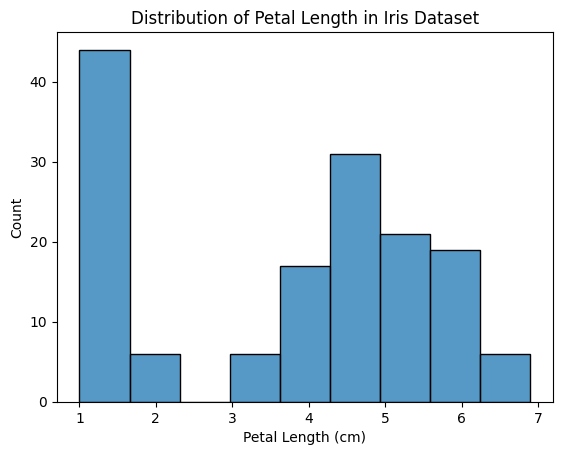

In [11]:
# Create a histogram for Petal Length
sns.histplot(x="petal_length", data=iris_data)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Count")
plt.title("Distribution of Petal Length in Iris Dataset")
plt.show()

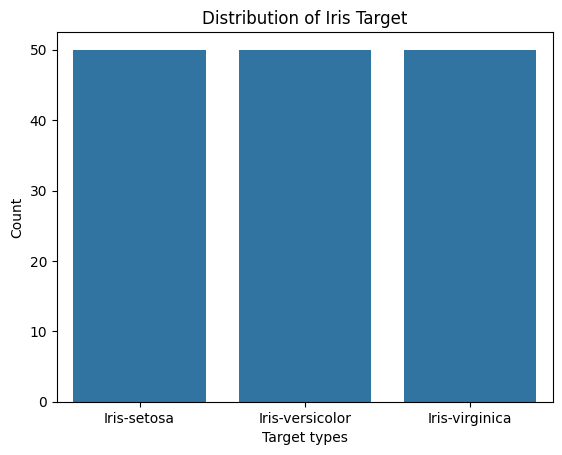

In [19]:
sns.countplot(x="target", data=iris_data)
plt.xlabel("Target types")
plt.ylabel("Count")
plt.title("Distribution of Iris Target")
plt.show()


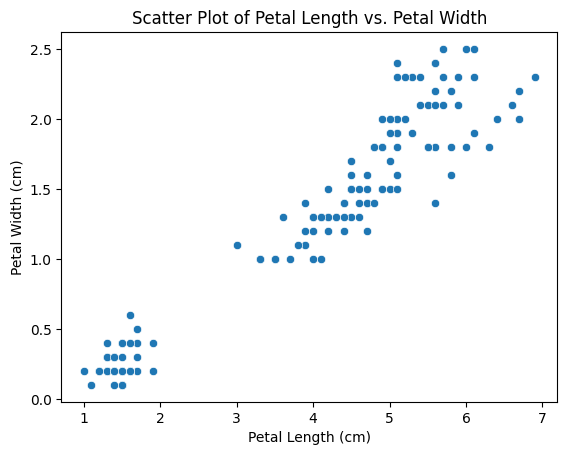

In [21]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris_data)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Scatter Plot of Petal Length vs. Petal Width")
plt.show()

Data Filtering with some condition

In [22]:
#using Pandas DataFrame query method
# Filter rows with Petal Length > 2
filtered_iris = iris_data.query("petal_length > 2")

print(filtered_iris)


     sepal_length  sepal_width  petal_length  petal_width           target
50            7.0          3.2           4.7          1.4  Iris-versicolor
51            6.4          3.2           4.5          1.5  Iris-versicolor
52            6.9          3.1           4.9          1.5  Iris-versicolor
53            5.5          2.3           4.0          1.3  Iris-versicolor
54            6.5          2.8           4.6          1.5  Iris-versicolor
..            ...          ...           ...          ...              ...
145           6.7          3.0           5.2          2.3   Iris-virginica
146           6.3          2.5           5.0          1.9   Iris-virginica
147           6.5          3.0           5.2          2.0   Iris-virginica
148           6.2          3.4           5.4          2.3   Iris-virginica
149           5.9          3.0           5.1          1.8   Iris-virginica

[100 rows x 5 columns]


In [23]:
# using Pandas DataFrame boolean indexing
filtered_iris = iris_data[iris_data["sepal_width"] < 3]

print(filtered_iris)


     sepal_length  sepal_width  petal_length  petal_width           target
8             4.4          2.9           1.4          0.2      Iris-setosa
41            4.5          2.3           1.3          0.3      Iris-setosa
53            5.5          2.3           4.0          1.3  Iris-versicolor
54            6.5          2.8           4.6          1.5  Iris-versicolor
55            5.7          2.8           4.5          1.3  Iris-versicolor
57            4.9          2.4           3.3          1.0  Iris-versicolor
58            6.6          2.9           4.6          1.3  Iris-versicolor
59            5.2          2.7           3.9          1.4  Iris-versicolor
60            5.0          2.0           3.5          1.0  Iris-versicolor
62            6.0          2.2           4.0          1.0  Iris-versicolor
63            6.1          2.9           4.7          1.4  Iris-versicolor
64            5.6          2.9           3.6          1.3  Iris-versicolor
67            5.8        

In [25]:
#Using list comprehension
filtered_iris = [row for row in iris_data.itertuples() if row[5] == "Iris-versicolor"]

print(filtered_iris)


[Pandas(Index=50, sepal_length=7.0, sepal_width=3.2, petal_length=4.7, petal_width=1.4, target='Iris-versicolor'), Pandas(Index=51, sepal_length=6.4, sepal_width=3.2, petal_length=4.5, petal_width=1.5, target='Iris-versicolor'), Pandas(Index=52, sepal_length=6.9, sepal_width=3.1, petal_length=4.9, petal_width=1.5, target='Iris-versicolor'), Pandas(Index=53, sepal_length=5.5, sepal_width=2.3, petal_length=4.0, petal_width=1.3, target='Iris-versicolor'), Pandas(Index=54, sepal_length=6.5, sepal_width=2.8, petal_length=4.6, petal_width=1.5, target='Iris-versicolor'), Pandas(Index=55, sepal_length=5.7, sepal_width=2.8, petal_length=4.5, petal_width=1.3, target='Iris-versicolor'), Pandas(Index=56, sepal_length=6.3, sepal_width=3.3, petal_length=4.7, petal_width=1.6, target='Iris-versicolor'), Pandas(Index=57, sepal_length=4.9, sepal_width=2.4, petal_length=3.3, petal_width=1.0, target='Iris-versicolor'), Pandas(Index=58, sepal_length=6.6, sepal_width=2.9, petal_length=4.6, petal_width=1.3, 

Grouping and Aggregation

In [29]:
# Group by target and calculate mean petal length
grouped_means = iris_data.groupby("target")["petal_length"].mean()

print(grouped_means)


target
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64


In [31]:
# Calculate median target width for each group
grouped_medians = iris_data.groupby("target")["sepal_width"].median()

print(grouped_medians)


target
Iris-setosa        3.4
Iris-versicolor    2.8
Iris-virginica     3.0
Name: sepal_width, dtype: float64


In [32]:
#Calculate on group data stat
grouped_stats = iris_data.groupby("target")["petal_length"].agg(["mean", "median", "std"])

print(grouped_stats)


                  mean  median       std
target                                  
Iris-setosa      1.464    1.50  0.173511
Iris-versicolor  4.260    4.35  0.469911
Iris-virginica   5.552    5.55  0.551895


#Calculate diffrence using aggregate function in pandas



In [38]:
grouped_differences = iris_data.groupby("target").apply(lambda group: group["petal_length"] - group["sepal_length"])

print(grouped_differences)

target             
Iris-setosa     0     -3.7
                1     -3.5
                2     -3.4
                3     -3.1
                4     -3.6
                      ... 
Iris-virginica  145   -1.5
                146   -1.3
                147   -1.3
                148   -0.8
                149   -0.8
Length: 150, dtype: float64


C:\temp\ipykernel_19512\591664597.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_differences = iris_data.groupby("target").apply(lambda group: group["petal_length"] - group["sepal_length"])


Correlation and analysis 

In [39]:
# Select numerical columns
numerical_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]

# Calculate correlation matrix within each group
group_correlations = iris_data.groupby("target")[numerical_columns].corr()

# Print the correlation matrix for each group
print(group_correlations)

                              petal_length  petal_width  sepal_length  \
target                                                                  
Iris-setosa     petal_length      1.000000     0.306308      0.263874   
                petal_width       0.306308     1.000000      0.279092   
                sepal_length      0.263874     0.279092      1.000000   
                sepal_width       0.176695     0.279973      0.746780   
Iris-versicolor petal_length      1.000000     0.786668      0.754049   
                petal_width       0.786668     1.000000      0.546461   
                sepal_length      0.754049     0.546461      1.000000   
                sepal_width       0.560522     0.663999      0.525911   
Iris-virginica  petal_length      1.000000     0.322108      0.864225   
                petal_width       0.322108     1.000000      0.281108   
                sepal_length      0.864225     0.281108      1.000000   
                sepal_width       0.401045     0.53